In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from computerrefractored import Computer
import utils
import queue
from collections import defaultdict
%load_ext autoreload
%autoreload 2


In [2]:
def step(c,chosen):
    c.receiveinput(chosen)
    res = c.run()
    # print('res1',res)
    # print('chosesn1',chosen)
    if res != 0:
        # # north (1), south (2), west (3), and east (4)
        if chosen %2 == 0: chosen -=1
        else: chosen += 1
        # print('chosesn2',chosen)
        c.receiveinput(chosen)
        c.run()   
    return res
# # north (1), south (2), west (3), and east (4)
# 0: The repair droid hit a wall. Its position has not changed.
# 1: The repair droid has moved one step in the requested direction.
# 2: The repair droid has moved one step in the requested direction; its new position is the location of the oxygen system.
def edges(current_path,loc):
    direction = [1,2,3,4]
    edge = []
    path = []

    c = Computer(list(memory),noun,verb,[1])
    for p in current_path:
        c.receiveinput(p)
        c.run()
    for i in direction:
        # print(i)
        res = step(c,i)
        # print('res2',res)
        if res != 0:
            path.append(i)
            if i ==1: edge.append ((loc[0]+1,loc[1]))
            elif i ==2: edge.append ((loc[0]-1,loc[1]))
            elif i==3: edge.append ((loc[0],loc[1]-1))
            elif i ==4:edge.append ((loc[0],loc[1]+1))
        if res==2:
            print('found',loc,i)       
    # print(path, edge)
    return (path,edge)

In [3]:
noun, verb = 0,0
f=open('input.txt').read()
memory = tuple(int(i) for i in f.split(',')) # let's make it immutable as a tuple
memsize = 1000
memory = tuple(list(memory)+[0]*memsize)
discovered,paths = utils.bfs(edges=edges)

found (-14, -15) 3


In [4]:
len(paths[(-14,-16)])

298

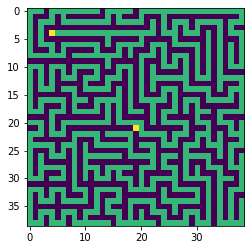

In [5]:
dim = utils.dimensions(list(discovered))
disc = utils.normalize(list(discovered))

pic = np.zeros(np.product(dim.range)).reshape(dim.range)
# no need to draw the walls, consider them 0
pic[tuple(zip(*disc))]=2 # list needs to be converted by index in multidemensional indexing
pic[(-14-dim.min[0],-16-dim.min[1])]=3
pic[(dim.min[0],dim.min[1])]=3
plt.imshow(pic)

In [6]:
# part 1
def newlocation(loc, chosen):
    if chosen ==1: return (loc[0]+1,loc[1])
    elif chosen ==2: return (loc[0]-1,loc[1])
    elif chosen==3: return (loc[0],loc[1]-1)
    elif chosen ==4: return (loc[0],loc[1]+1)

G=nx.Graph()
G.add_nodes_from(discovered)
for e in discovered:
    if newlocation(e,1) in discovered: G.add_edge(e,newlocation(e,1))
    if newlocation(e,2) in discovered: G.add_edge(e,newlocation(e,2))
    if newlocation(e,3) in discovered: G.add_edge(e,newlocation(e,3))
    if newlocation(e,4) in discovered: G.add_edge(e,newlocation(e,4))
len(nx.shortest_path(G, source=(0,0), target=(-14,-16)))-1

298

In [7]:
# part 2
dis = []
for e in discovered:
    dis.append(len(nx.shortest_path(G, source=(-14,-16), target=e))-1)
max(dis)

346

In [9]:
len(discovered),len(dis)

(799, 799)

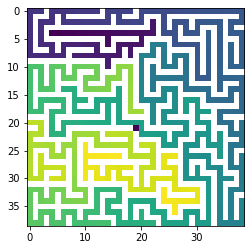

In [30]:
pic = np.zeros(np.product(dim.range)).reshape(dim.range)
# no need to draw the walls, consider them 0
pic[tuple(zip(*disc))] = dis # list needs to be converted by
pic[pic==0] = np.nan
# index in multidemensional indexing
pic[(-14-dim.min[0],-16-dim.min[1])]=0
pic[(dim.min[0],dim.min[1])]=0
plt.imshow(pic)

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

x, y = zip(*maze.keys())
xmin, xmax = min(x), max(x)
ymin, ymax = min(y), max(y)
rows = ymax - ymin + 1
cols = xmax - xmin + 1
Z = np.zeros((rows, cols))
for row in range(rows):
    for col in range(cols):
        x, y = col + xmin, ymax - row
        Z[row, col] = distances[(x, y)] if maze[(x, y)] > 0 else np.nan
plt.imshow(Z)
plt.colorbar()
plt.show()